In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import sys
import os

In [2]:
script_directory = os.path.dirname(os.path.dirname(os.path.realpath(sys.argv[0])))
print(script_directory)
if os.path.basename(script_directory).startswith("Python"):
    script_directory = "../"
    get_ipython().run_line_magic('matplotlib', 'inline')
else:
    script_directory = os.path.dirname(os.path.dirname(os.path.realpath(sys.argv[0])))

C:\Users\karls\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311


In [3]:
df_train   = pd.read_csv(script_directory + "/data/learning/ml-learning-data.csv",   sep=';', na_values=['', '-'], parse_dates=['LastNewsletter', 'date'], dayfirst=True)
df_train['DaysSinceLastNewsletter'] = df_train['DaysSinceLastNewsletter'].str.replace(',', '.').astype(float)

df_train['id'] = [i for i in range(len(df_train.index))]
df_train.set_index('id', inplace=True)
"Training dataset: {}".format(df_train.shape)

'Training dataset: (13292, 11)'

In [4]:
df_train.describe()


,date,DaysSinceLastNewsletter,DaysUntilNextPurchase,FirstProductOrder,LastNewsletter,Units,Preis,UnitRelativeDays
count,13292,7882.000000,13292.000000,13292.000000,7882,13292.000000,13292.000000,13292.000000
mean,2023-02-07 03:06:00.758350848,13.219214,69.341634,0.171908,2023-01-08 01:17:16.792692224,2.142116,75.155206,53.486082
min,2022-07-01 00:00:00,0.000588,1.000000,0.000000,2022-07-20 00:00:00,1.000000,0.000000,1.000000
25%,2022-10-12 00:00:00,4.977636,13.000000,0.000000,2022-09-07 00:00:00,1.000000,18.000000,7.000000
50%,2023-01-19 00:00:00,11.120121,43.000000,0.000000,2022-10-06 00:00:00,1.000000,34.000000,28.000000
75%,2023-06-01 00:00:00,19.312839,102.000000,0.000000,2023-07-20 00:00:00,2.000000,74.000000,77.000000
max,2023-12-15 00:00:00,47.956406,479.000000,1.000000,2023-12-07 00:00:00,288.000000,23409.000000,299.000000
std,NaN,10.960125,73.513480,0.377315,NaN,5.060588,369.612333,62.877363


In [5]:
df_train.dropna(inplace=True)
df_train['date'] = df_train['date'].apply(lambda x: x.timestamp())
df_train['LastNewsletter'] = df_train['LastNewsletter'].apply(lambda x: x.timestamp())

In [6]:
def dummy_encode(in_df_train):
    df_train = in_df_train
    categorical_feats = [
        f for f in df_train.columns if df_train[f].dtype == 'object' and f != "id"
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
    return df_train

In [7]:
df_train = dummy_encode(df_train)

['Customerid', 'Orderid', 'Produktkey_Orders']


In [8]:
scaler = StandardScaler()

In [9]:
df_train

,date,DaysSinceLastNewsletter,DaysUntilNextPurchase,FirstProductOrder,LastNewsletter,Units,Preis,UnitRelativeDays,Customerid_61862c7c9f8155001c7bf0b3,Customerid_61862c7c9f8155001c7bf0b9,...,Produktkey_Orders_646ddec898cbc7f0281c8aaf,Produktkey_Orders_646e678a98cbc7f0281f54f5,Produktkey_Orders_64849db61246e51bcd14545f,Produktkey_Orders_649b352a1f512b559195d503,Produktkey_Orders_64aaf7a8949f1a555f660dc9,Produktkey_Orders_64aaf7ca949f1a555f660def,Produktkey_Orders_64aaf7f9949f1a555f660e25,Produktkey_Orders_64aaf818949f1a555f660e4b,Produktkey_Orders_650891f3c8d7cb4c649a4310,Produktkey_Orders_65317ebf7eea8424f85055bb
id,,,,,,,,,,,,,,,,,,,,,
0,1.658275e+09,0.311864,134,1,1.658275e+09,1,136,134,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.658275e+09,0.373299,7,0,1.658275e+09,1,35,7,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.658275e+09,0.374537,1,0,1.658275e+09,1,37,1,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.658275e+09,0.383232,124,0,1.658275e+09,1,164,124,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.658275e+09,0.394150,28,1,1.658275e+09,1,26,28,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,1.702339e+09,4.768567,1,0,1.701907e+09,1,29,1,False,False,...,False,False,False,False,False,False,False,False,False,False
7878,1.702339e+09,4.818295,3,0,1.701907e+09,1,16,3,False,False,...,False,False,False,False,False,False,False,False,False,False
7879,1.702339e+09,4.818295,2,0,1.701907e+09,1,70,2,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df_train[['date_t', 'DaysUntilNextPurchase_t','LastNewsletter_t', 'Units_t', 'Preis_t', 'UnitRelativeDays_t']] = scaler.fit_transform(df_train[['date', 'DaysUntilNextPurchase','LastNewsletter', 'Units', 'Preis', 'UnitRelativeDays']])

In [11]:
df_train

,date,DaysSinceLastNewsletter,DaysUntilNextPurchase,FirstProductOrder,LastNewsletter,Units,Preis,UnitRelativeDays,Customerid_61862c7c9f8155001c7bf0b3,Customerid_61862c7c9f8155001c7bf0b9,...,Produktkey_Orders_64aaf7f9949f1a555f660e25,Produktkey_Orders_64aaf818949f1a555f660e4b,Produktkey_Orders_650891f3c8d7cb4c649a4310,Produktkey_Orders_65317ebf7eea8424f85055bb,date_t,DaysUntilNextPurchase_t,LastNewsletter_t,Units_t,Preis_t,UnitRelativeDays_t
id,,,,,,,,,,,,,,,,,,,,,
0,1.658275e+09,0.311864,134,1,1.658275e+09,1,136,134,False,False,...,False,False,False,False,-1.146834,0.833257,-1.045024,-0.250060,0.159409,1.288203
1,1.658275e+09,0.373299,7,0,1.658275e+09,1,35,7,False,False,...,False,False,False,False,-1.146834,-0.817606,-1.045024,-0.250060,-0.113997,-0.723305
2,1.658275e+09,0.374537,1,0,1.658275e+09,1,37,1,False,False,...,False,False,False,False,-1.146834,-0.895600,-1.045024,-0.250060,-0.108583,-0.818337
3,1.658275e+09,0.383232,124,0,1.658275e+09,1,164,124,False,False,...,False,False,False,False,-1.146834,0.703268,-1.045024,-0.250060,0.235205,1.129817
4,1.658275e+09,0.394150,28,1,1.658275e+09,1,26,28,False,False,...,False,False,False,False,-1.146834,-0.544629,-1.045024,-0.250060,-0.138360,-0.390693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,1.702339e+09,4.768567,1,0,1.701907e+09,1,29,1,False,False,...,False,False,False,False,2.014967,-0.895600,2.022258,-0.250060,-0.130239,-0.818337
7878,1.702339e+09,4.818295,3,0,1.701907e+09,1,16,3,False,False,...,False,False,False,False,2.014967,-0.869602,2.022258,-0.250060,-0.165430,-0.786660
7879,1.702339e+09,4.818295,2,0,1.701907e+09,1,70,2,False,False,...,False,False,False,False,2.014967,-0.882601,2.022258,-0.250060,-0.019253,-0.802498


In [12]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

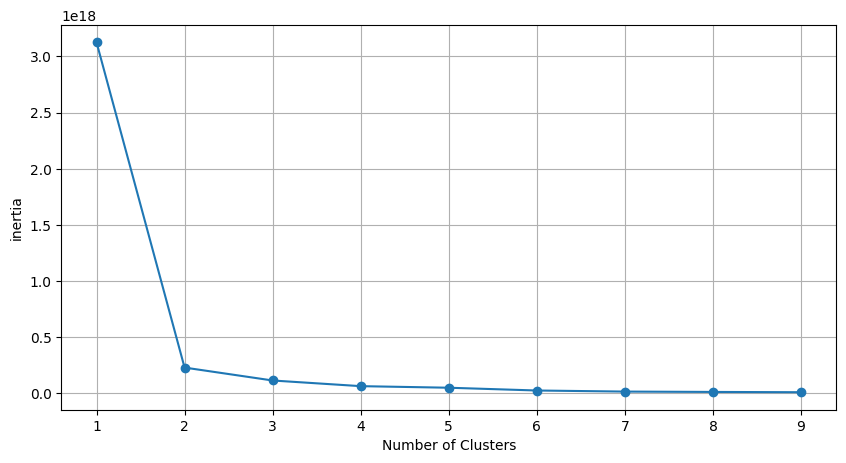

In [13]:
optimise_k_means(df_train, 10)

In [14]:
data = df_train.values


In [15]:
# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data)

In [16]:
num_clusters = 3  # You can adjust the number of clusters based on the diagram above
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
kmeans.fit(data)


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [17]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

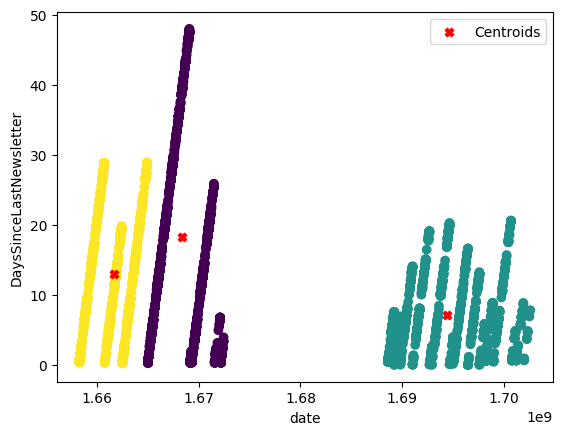

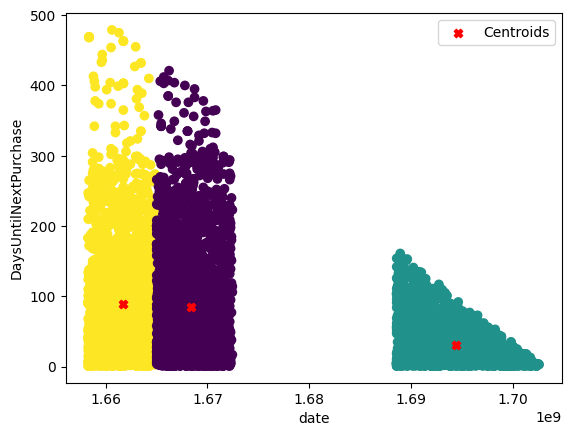

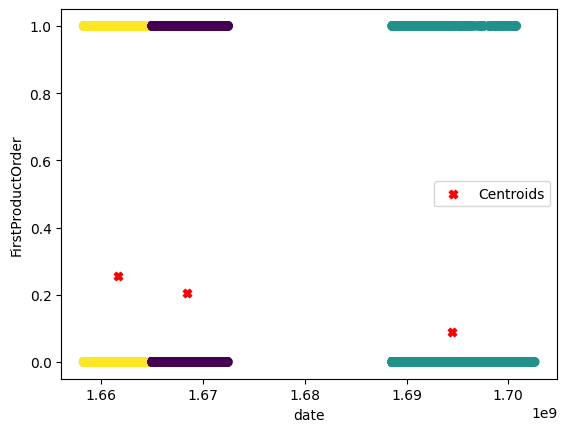

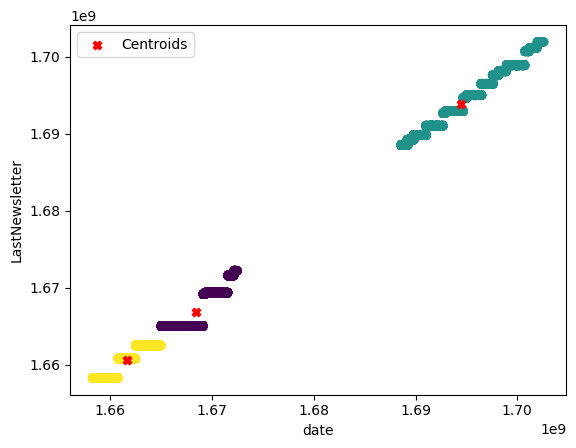

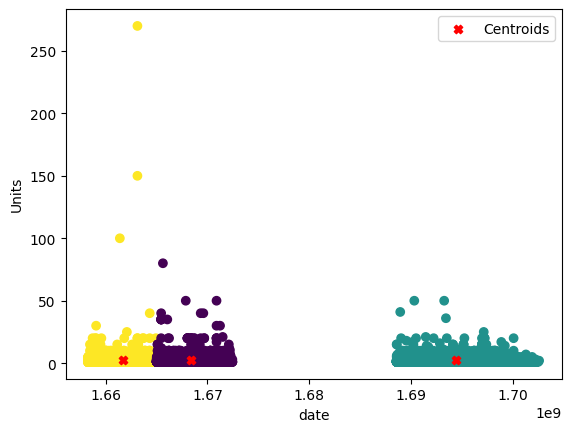

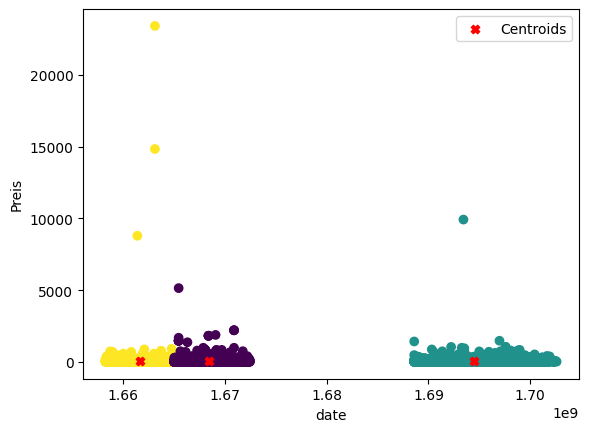

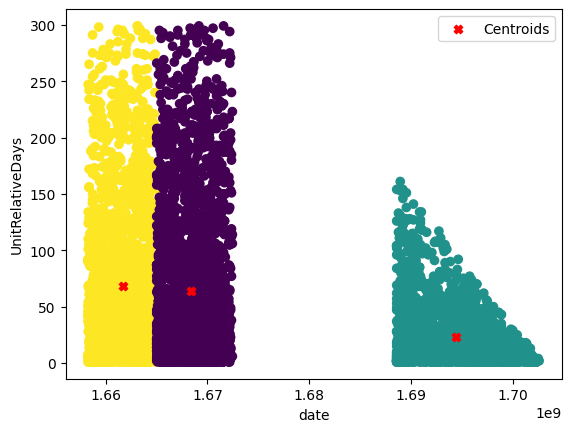

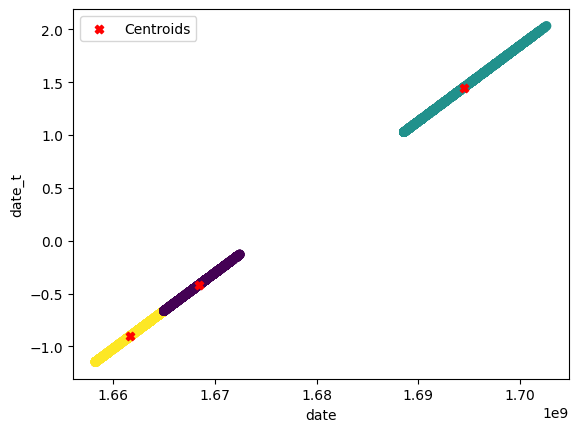

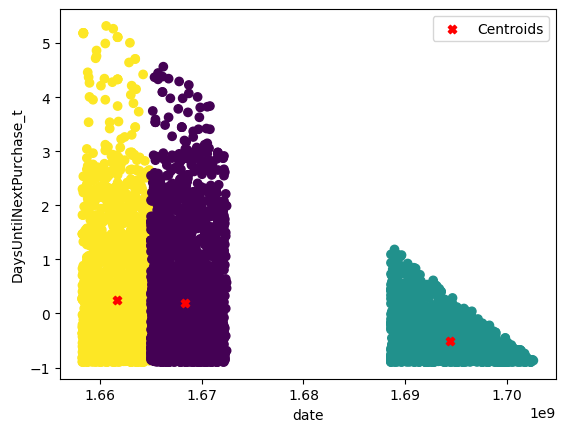

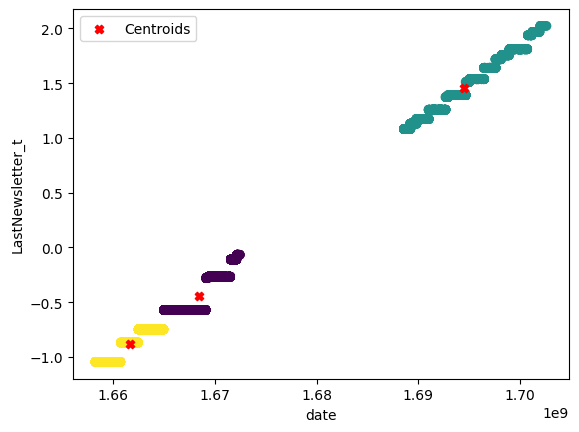

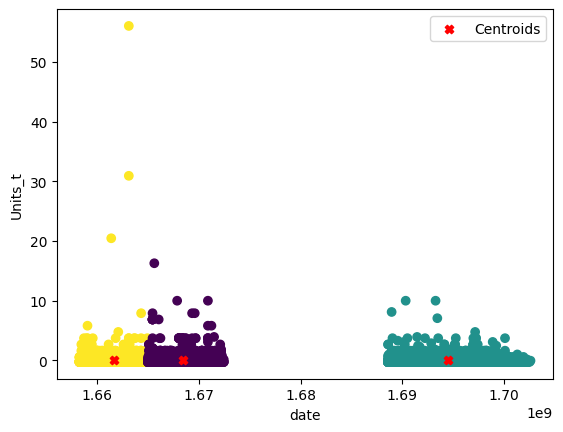

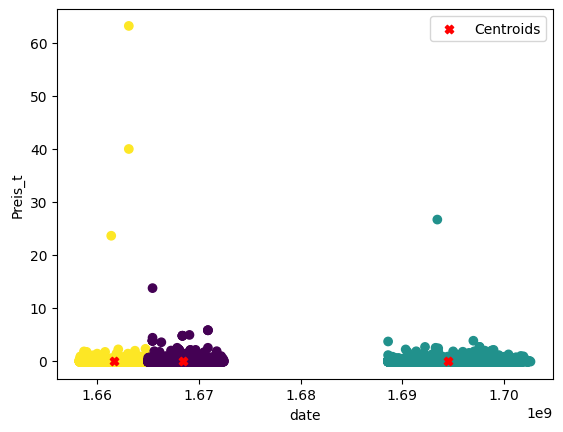

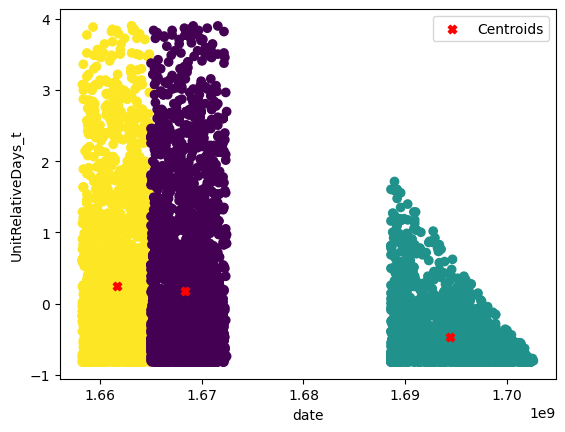

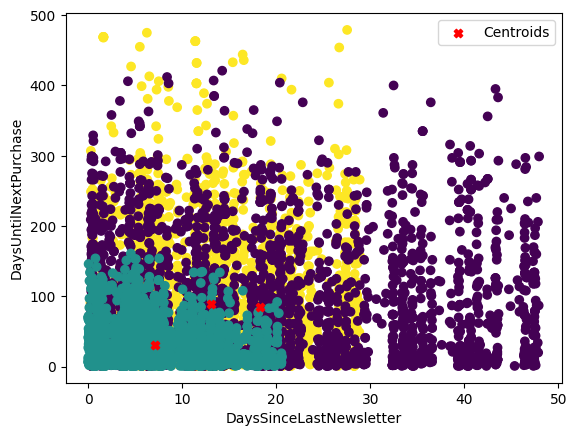

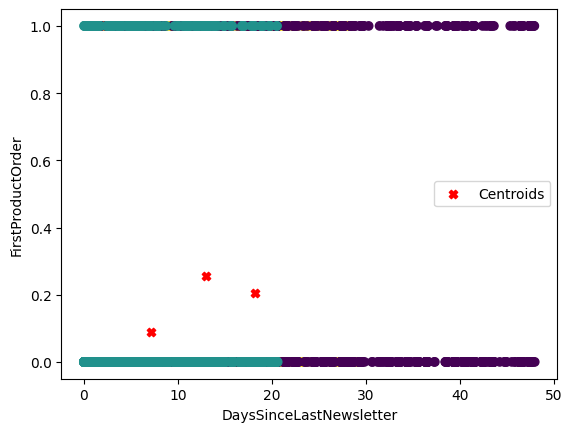

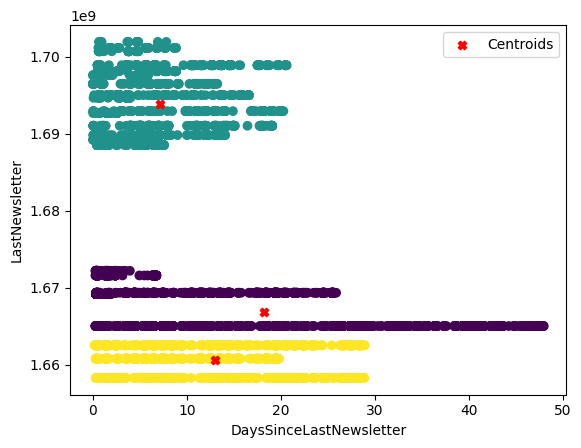

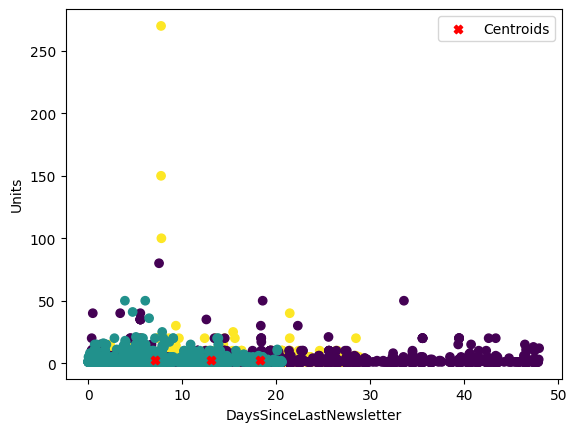

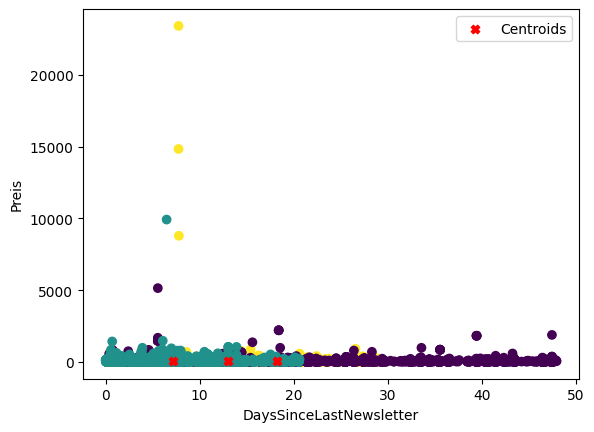

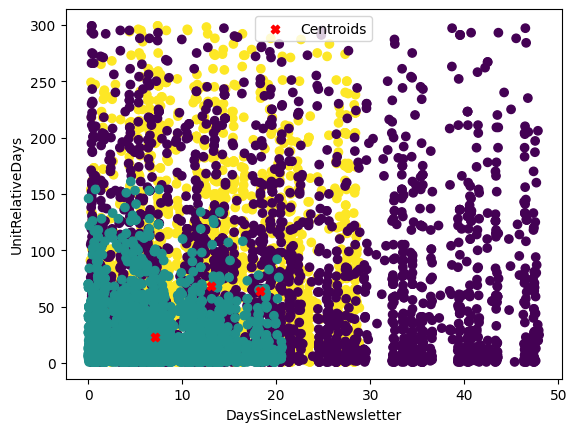

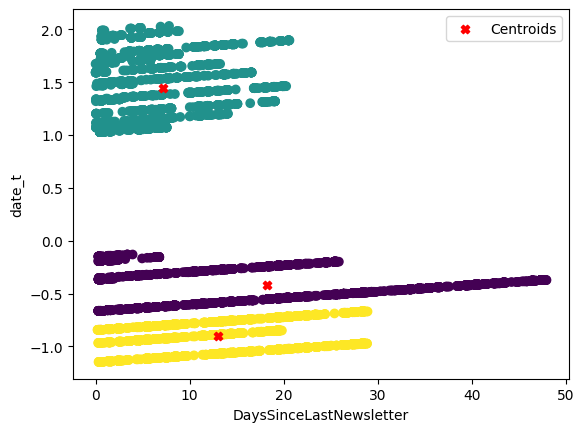

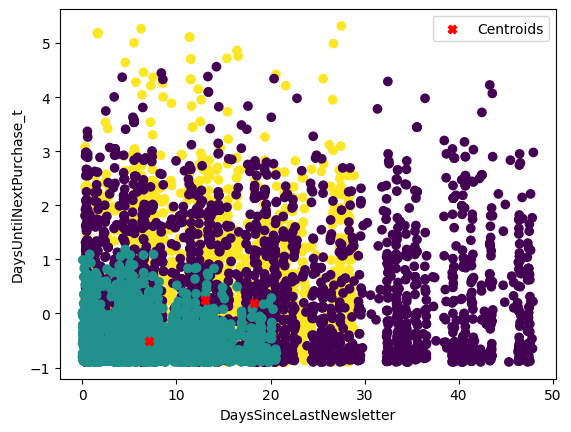

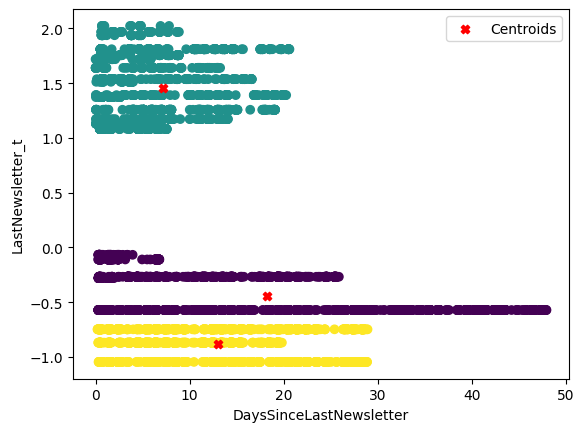

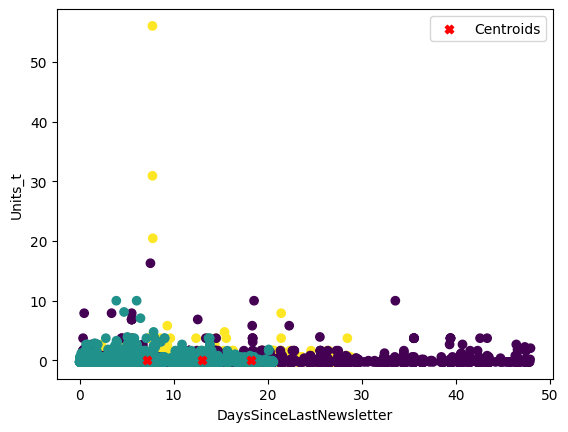

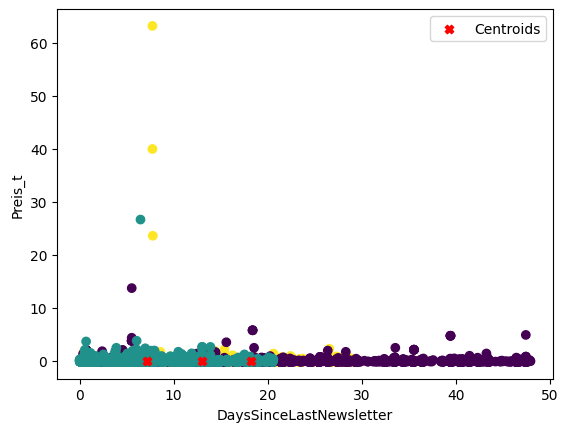

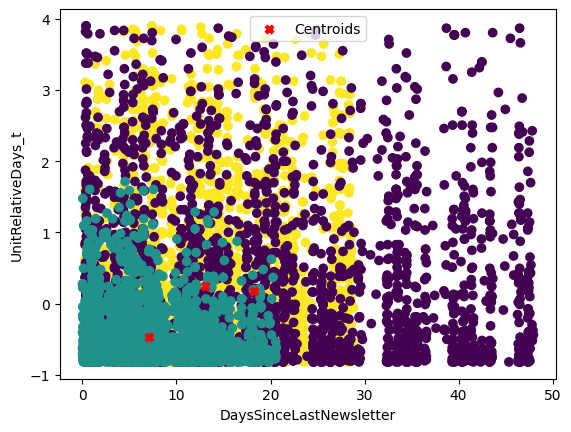

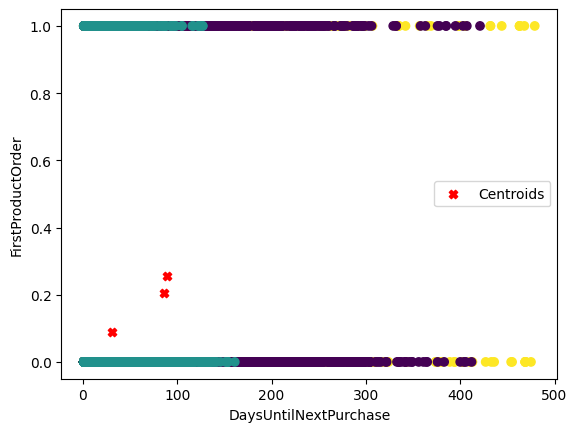

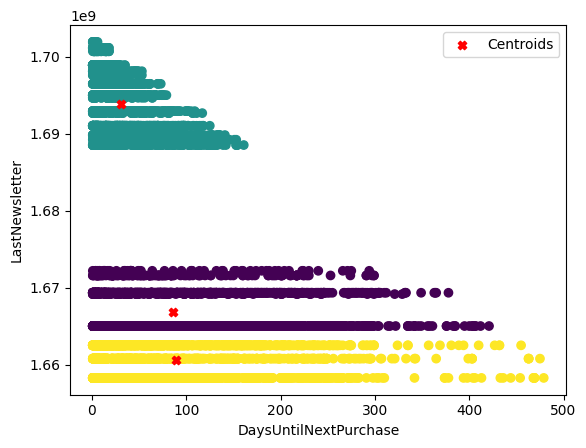

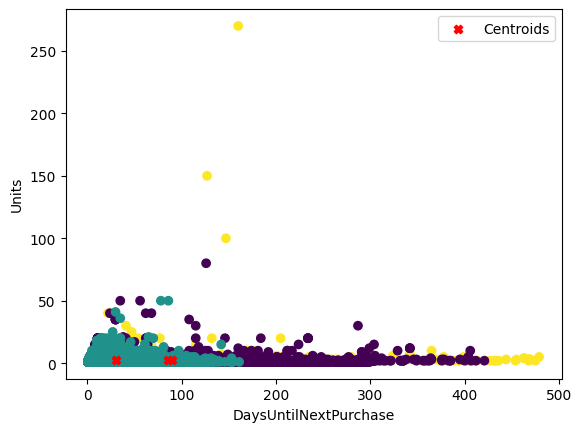

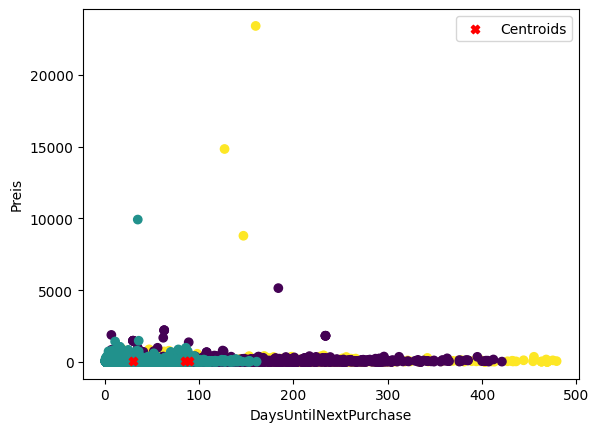

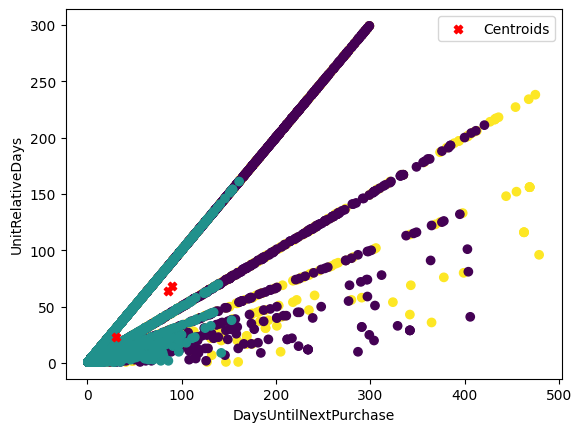

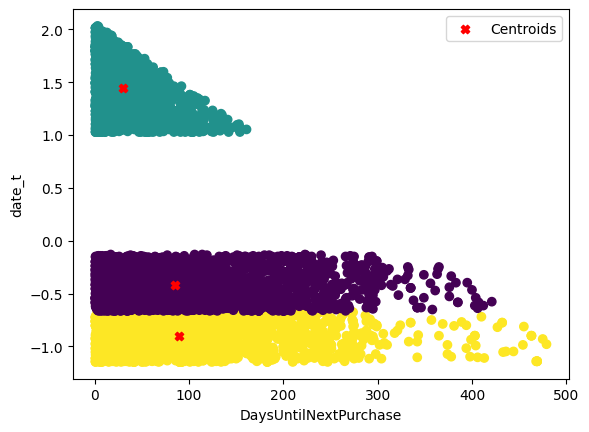

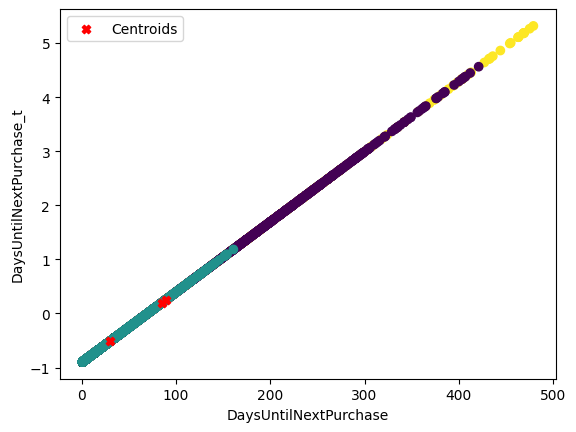

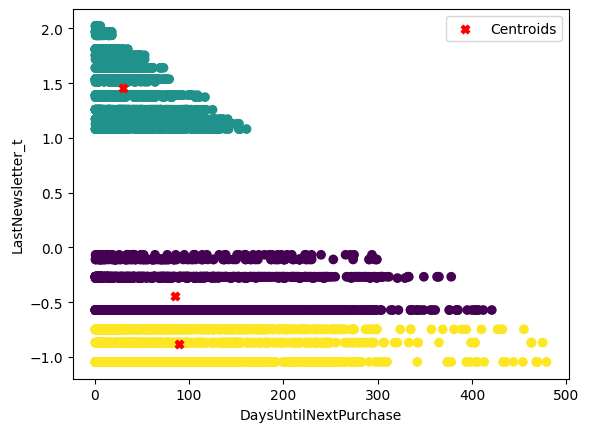

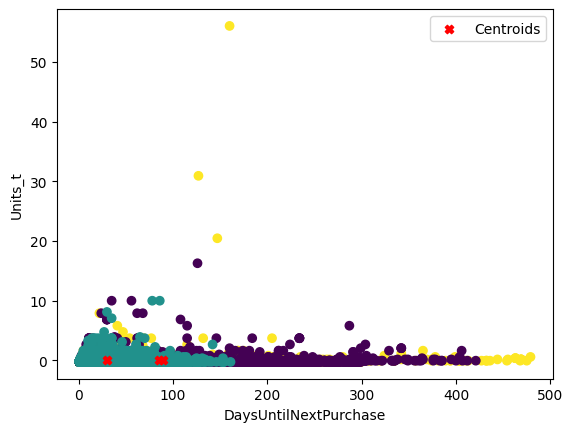

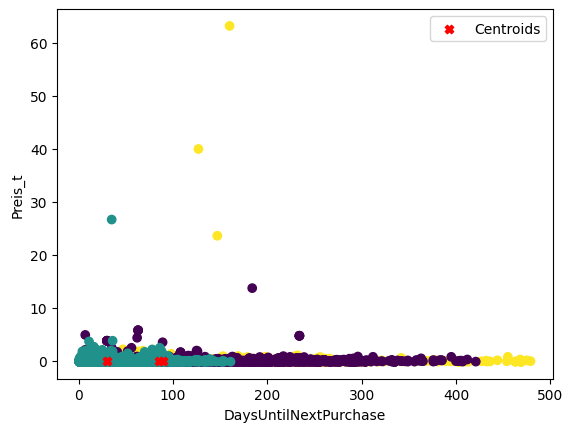

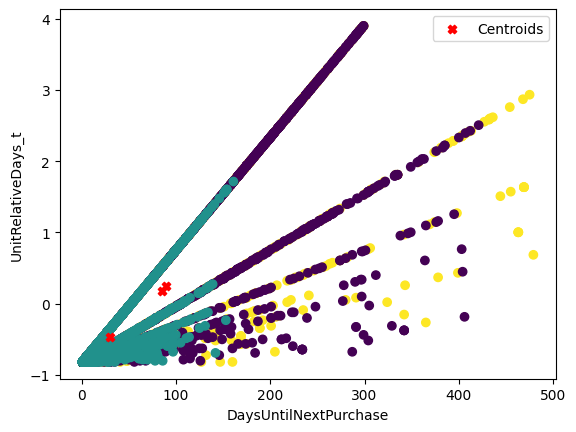

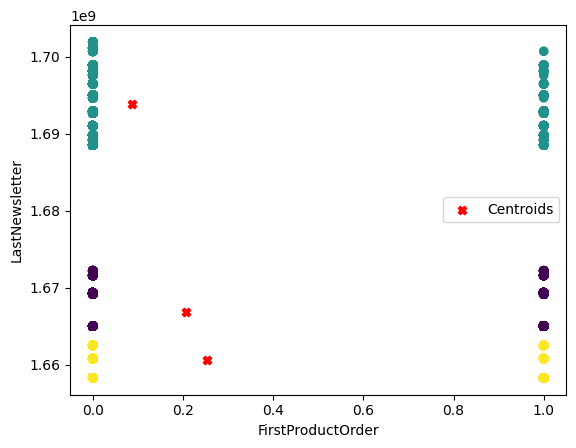

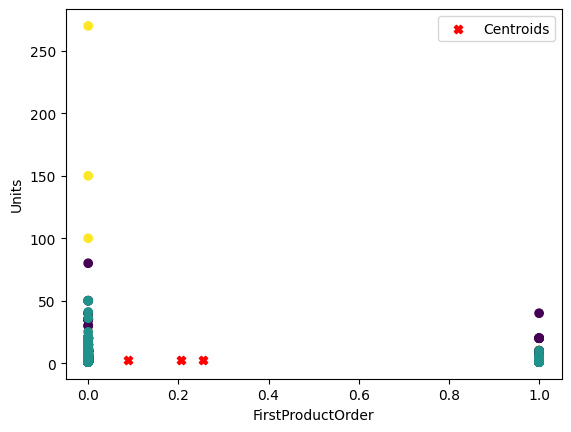

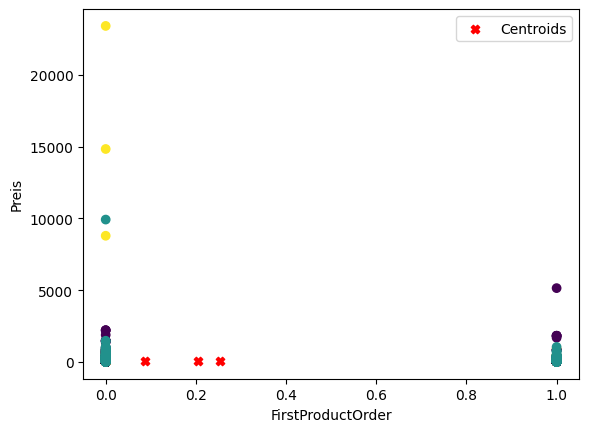

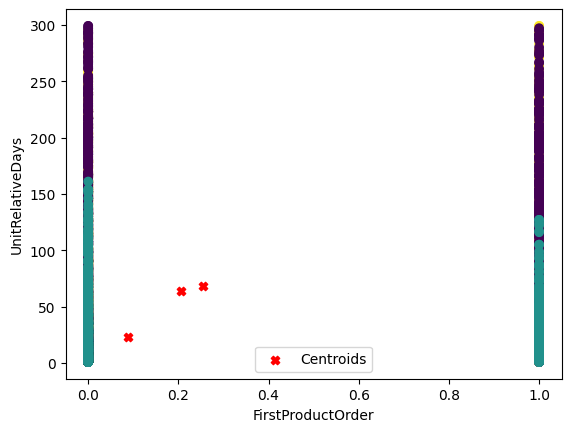

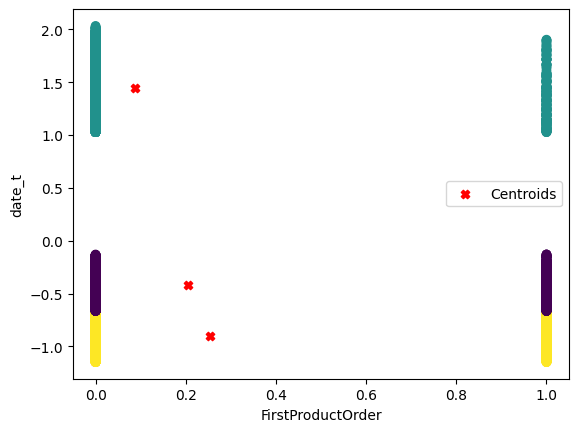

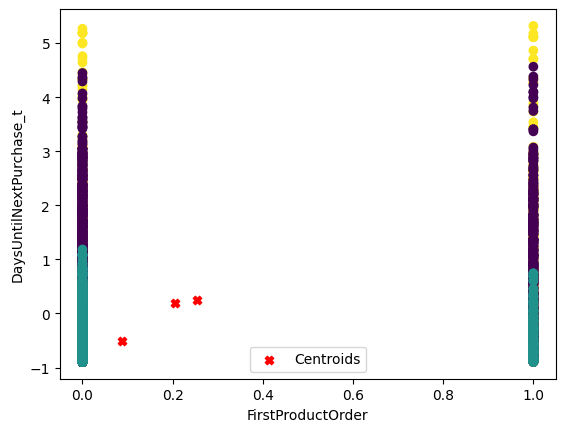

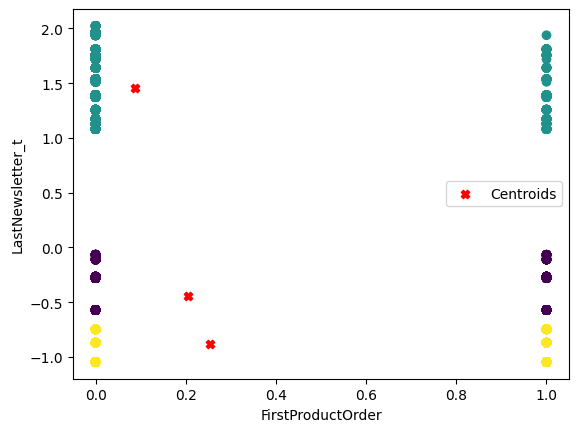

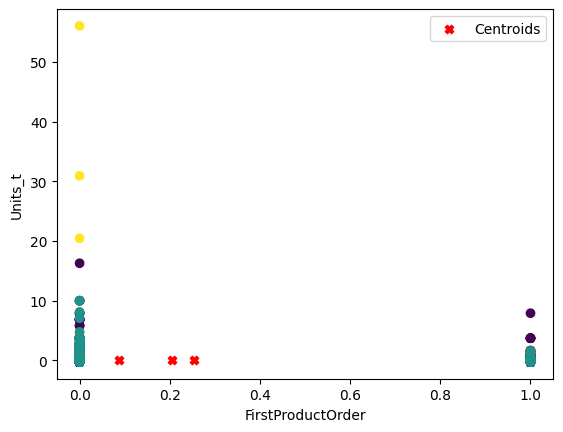

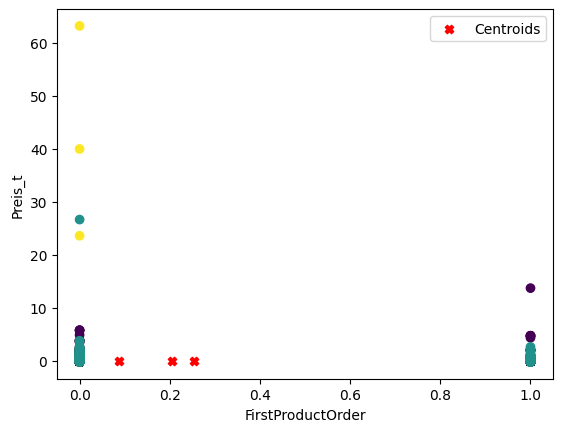

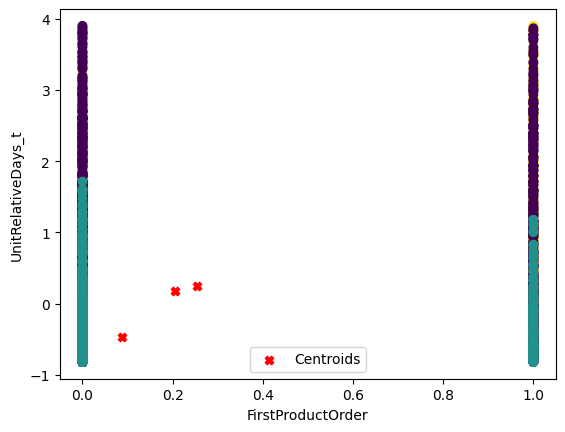

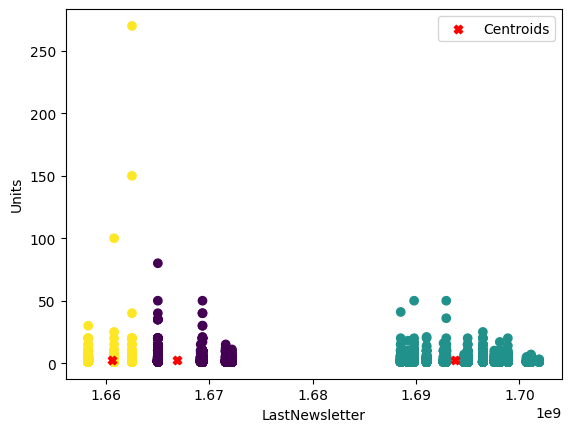

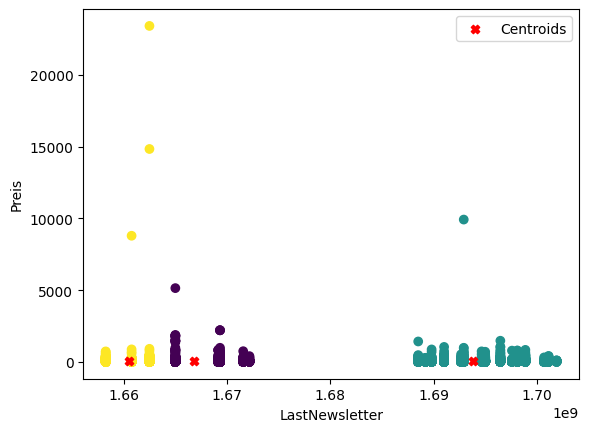

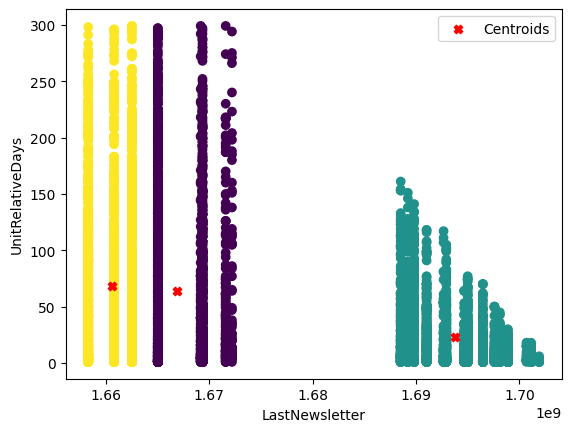

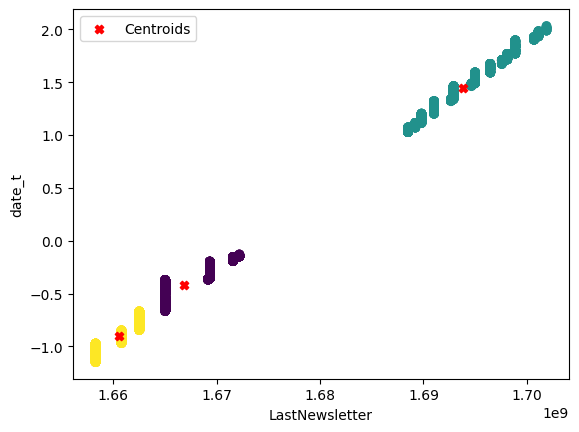

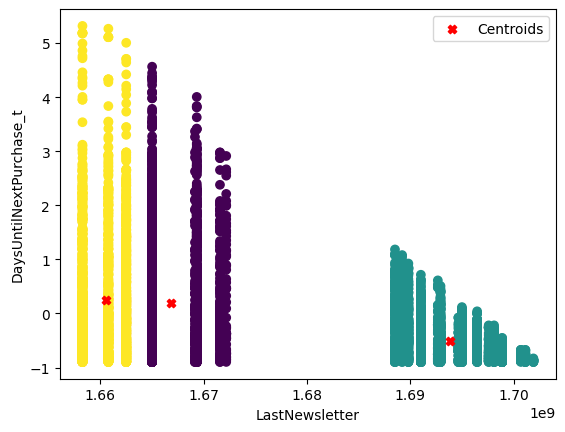

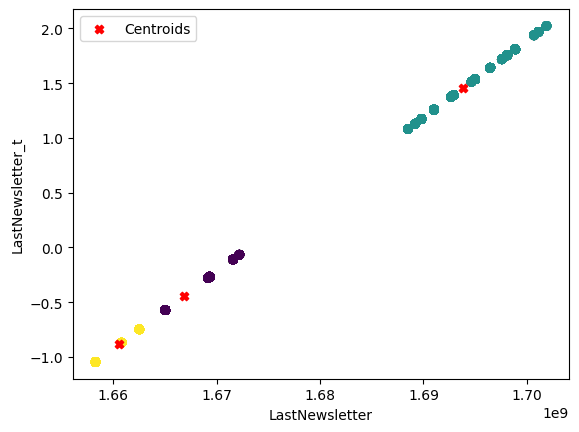

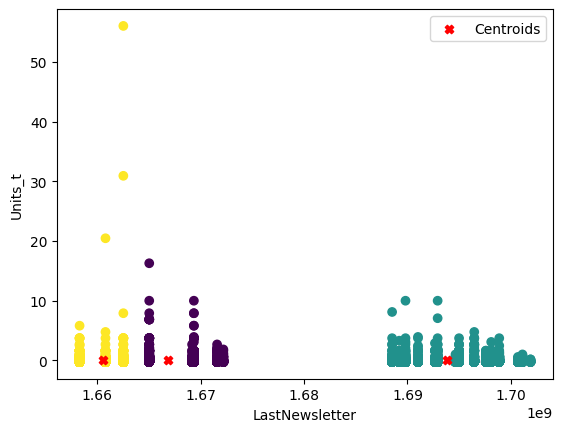

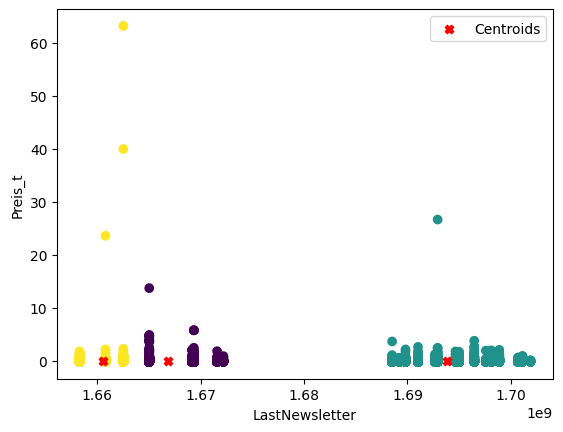

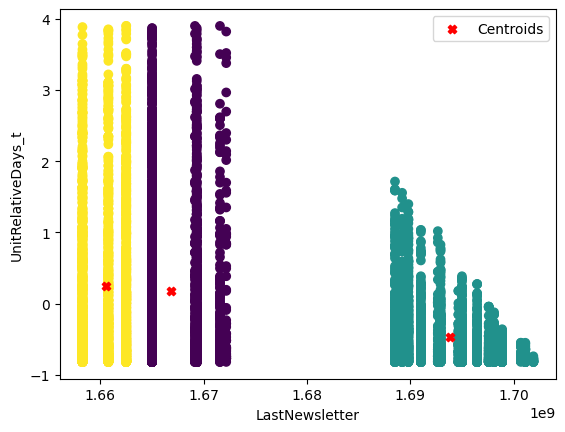

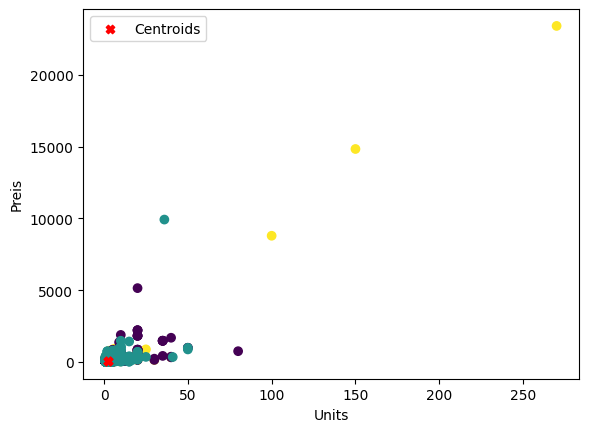

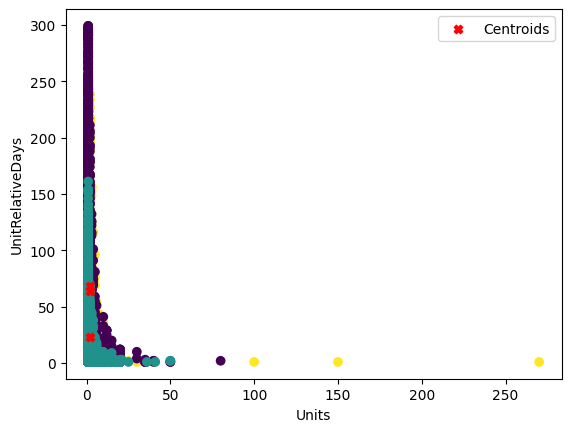

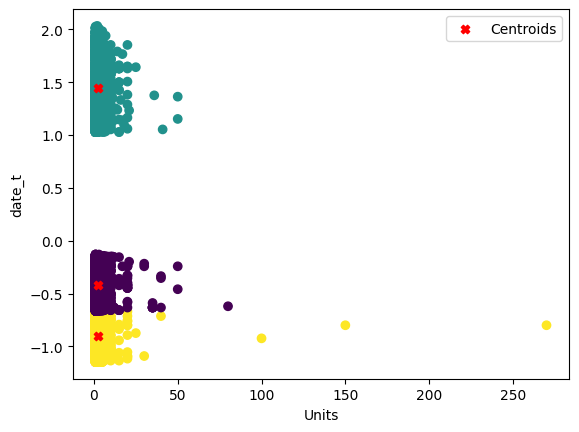

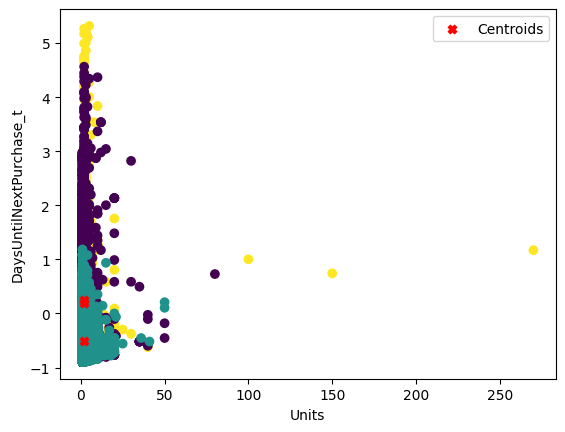

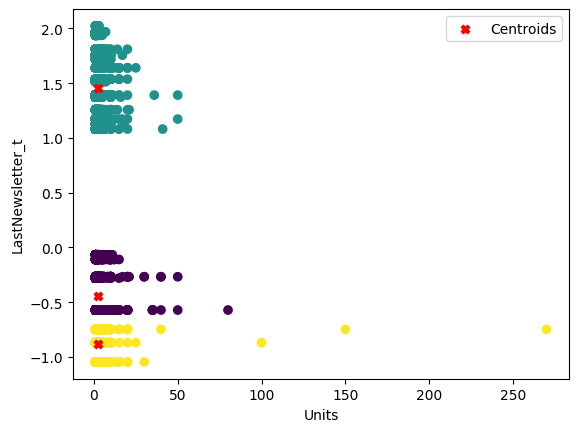

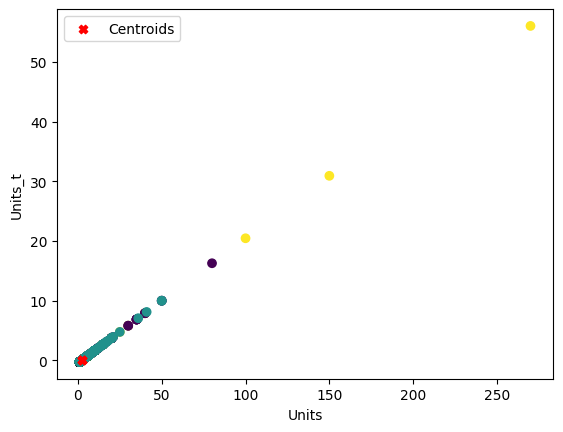

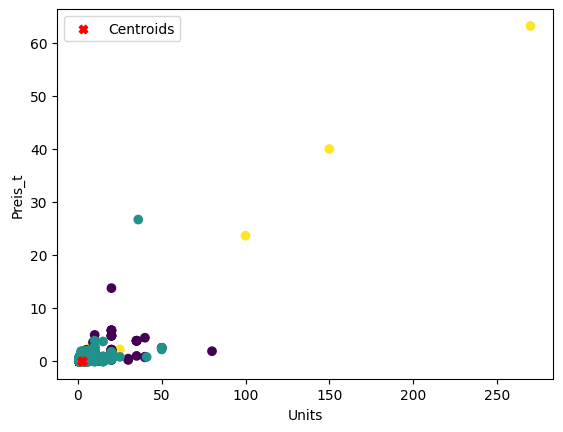

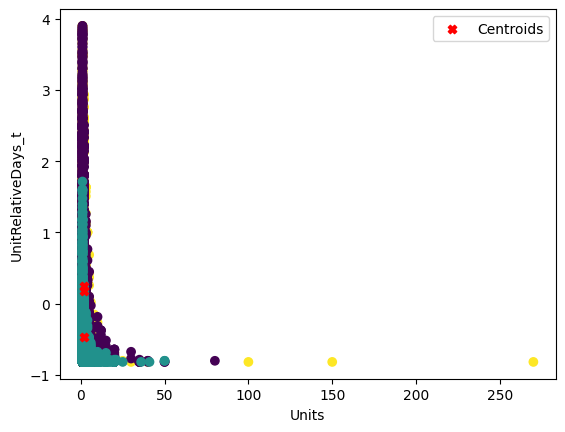

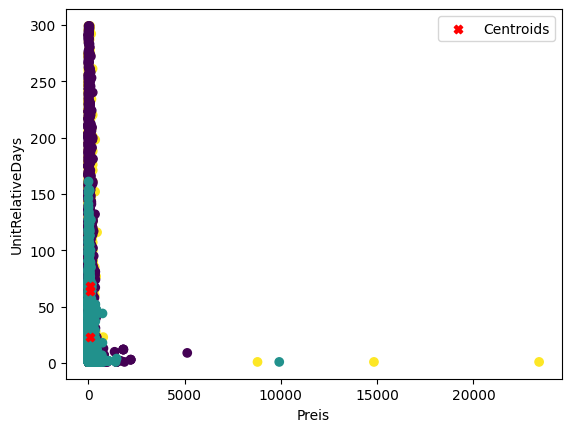

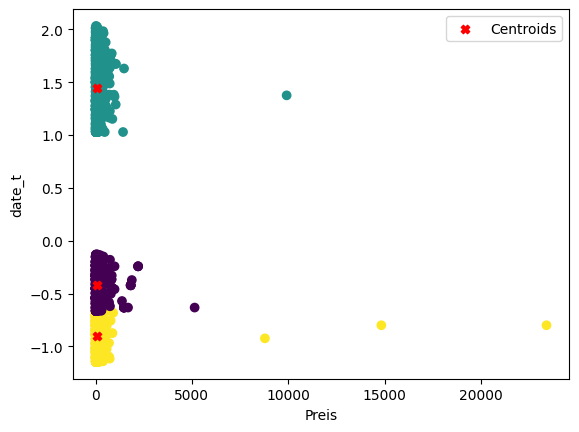

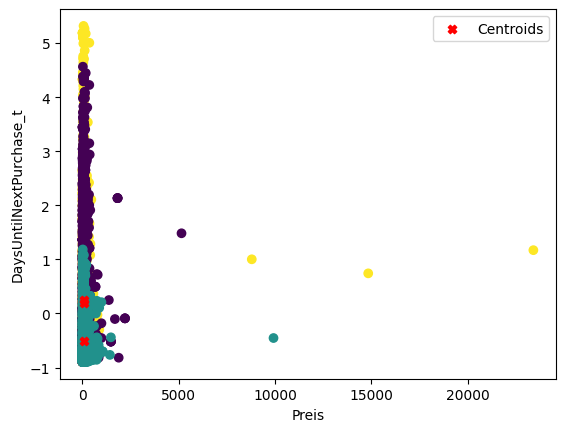

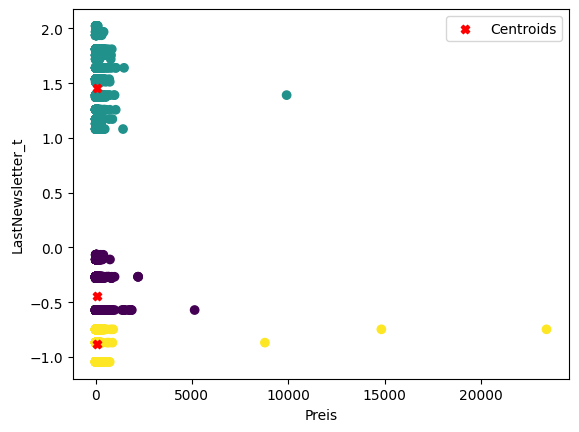

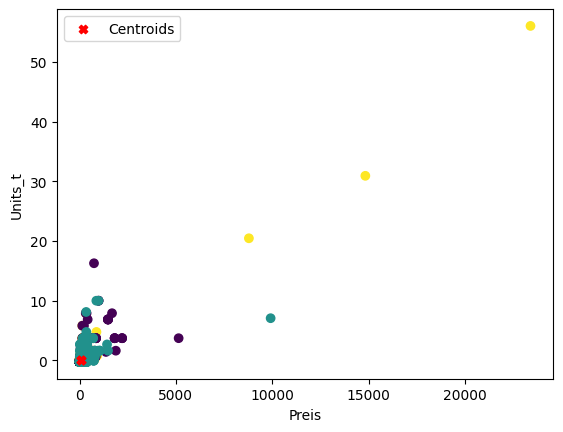

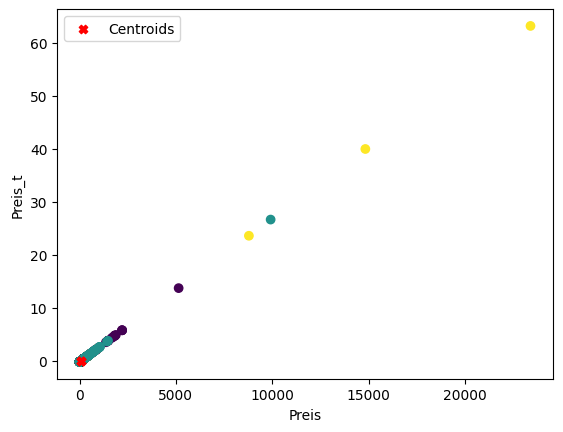

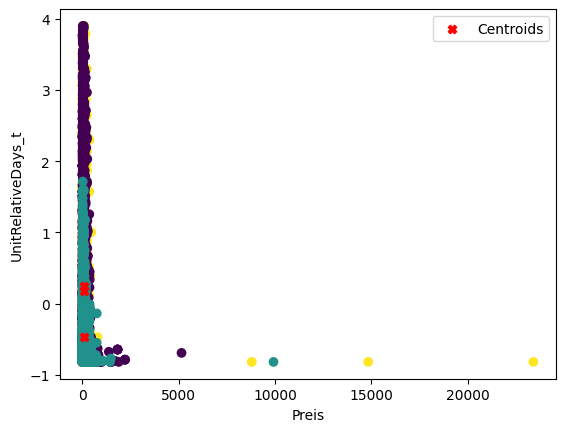

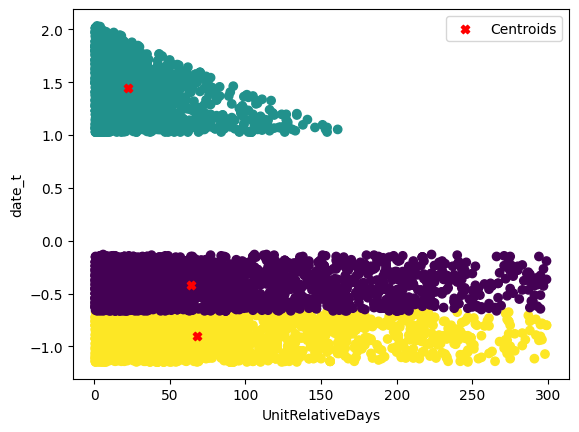

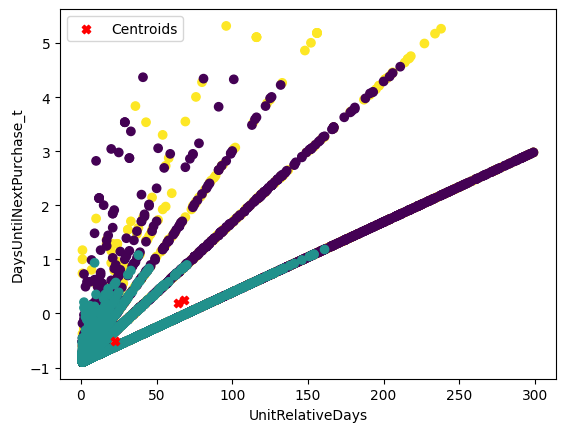

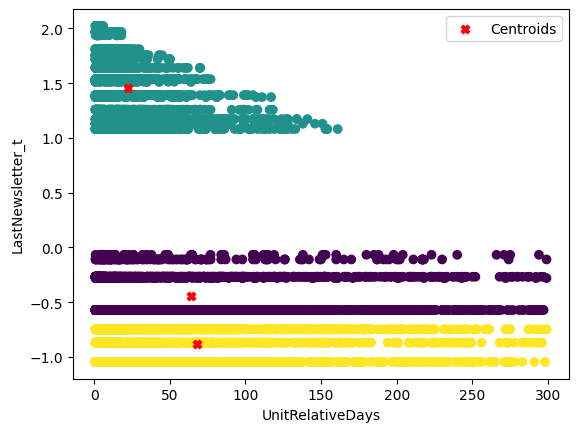

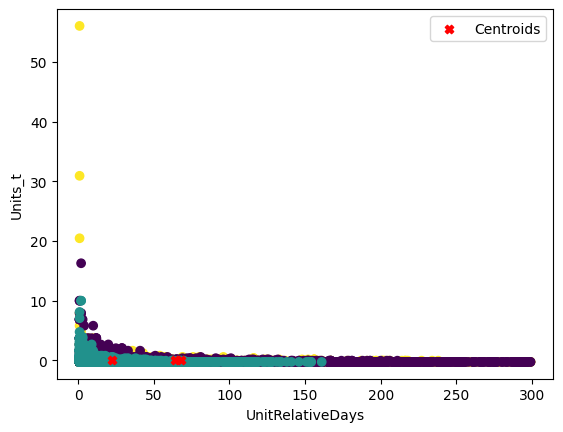

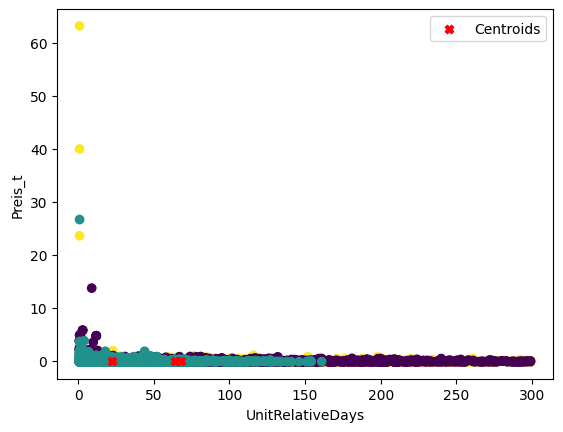

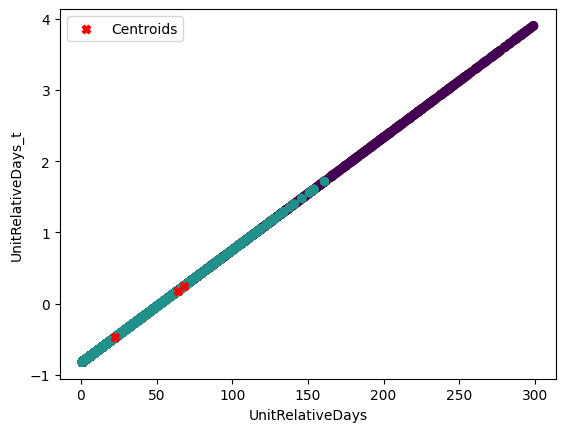

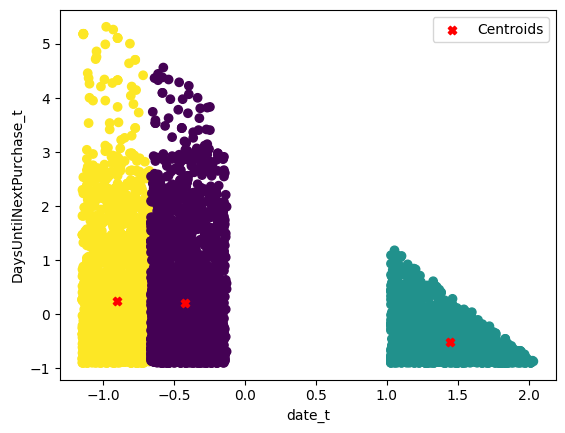

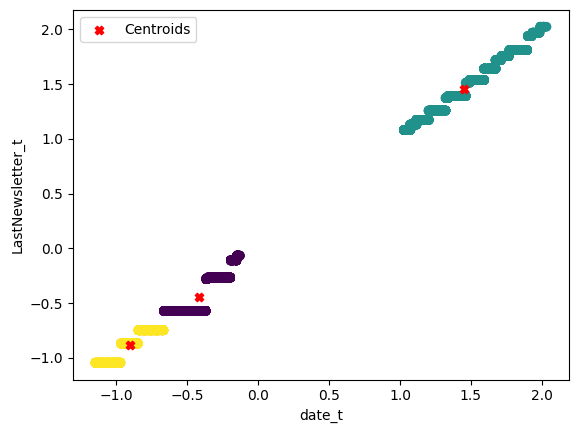

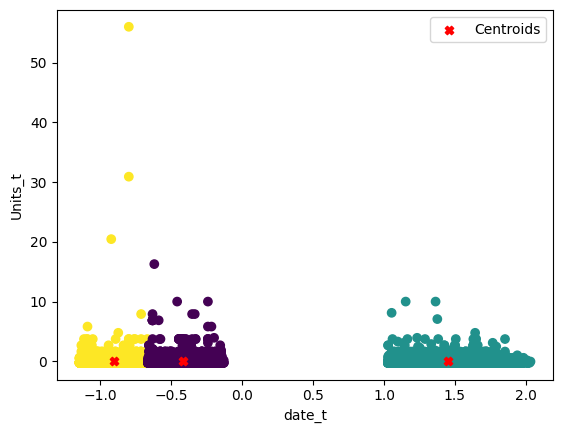

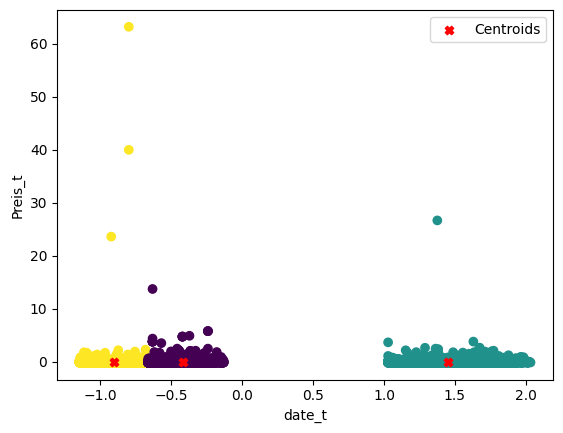

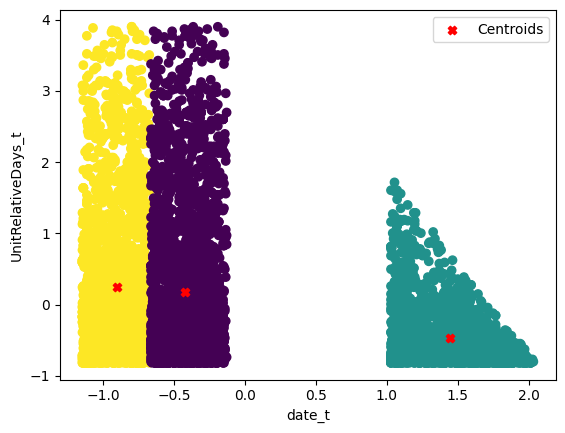

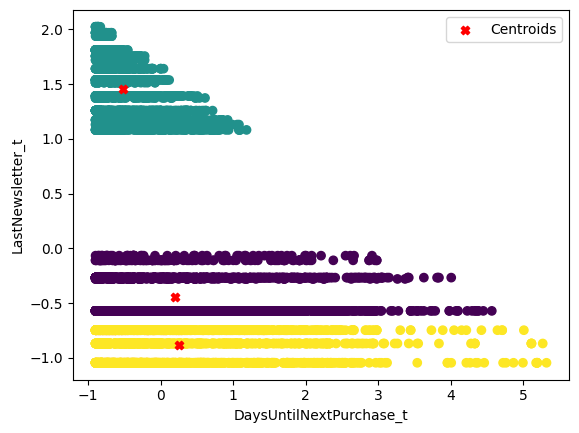

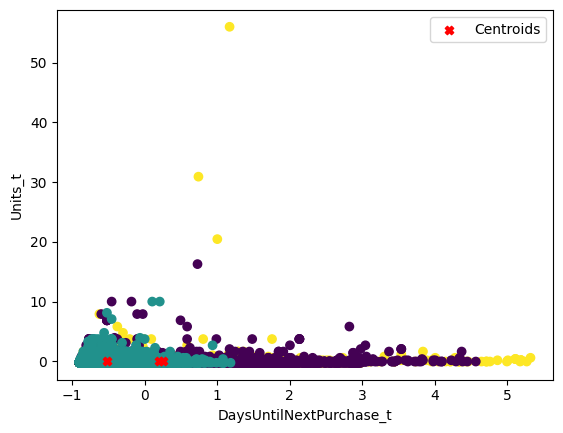

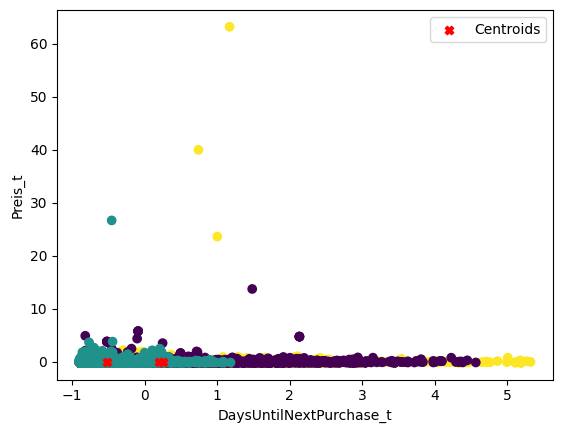

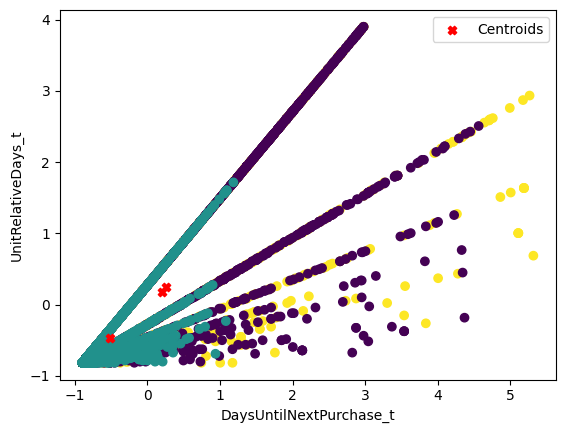

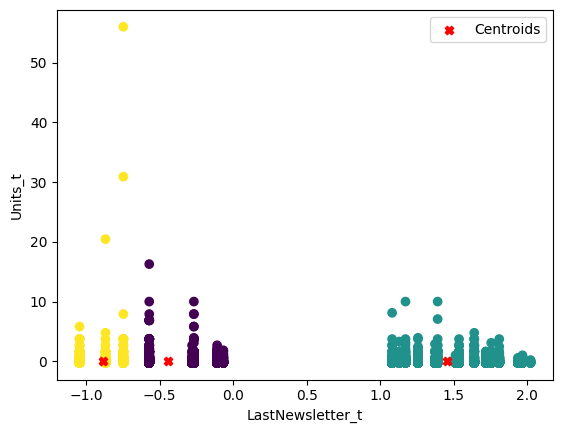

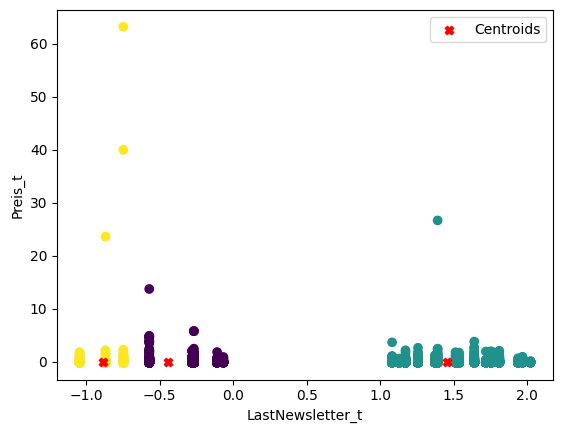

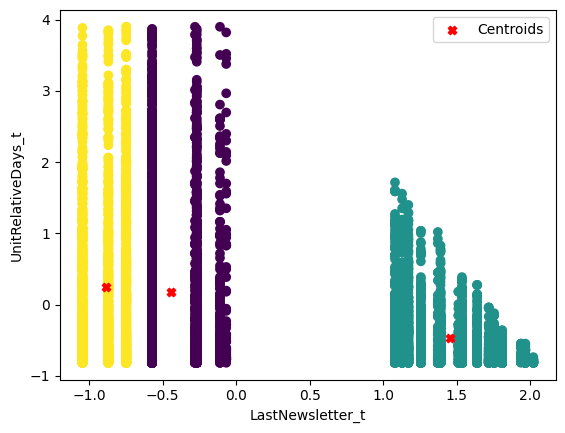

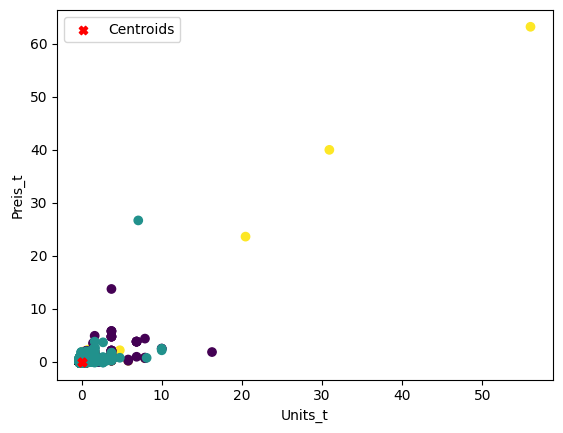

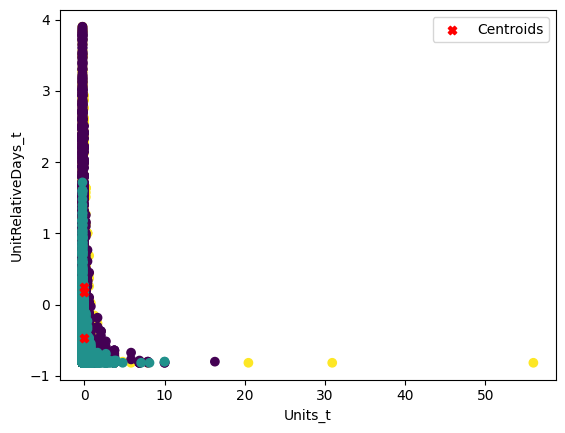

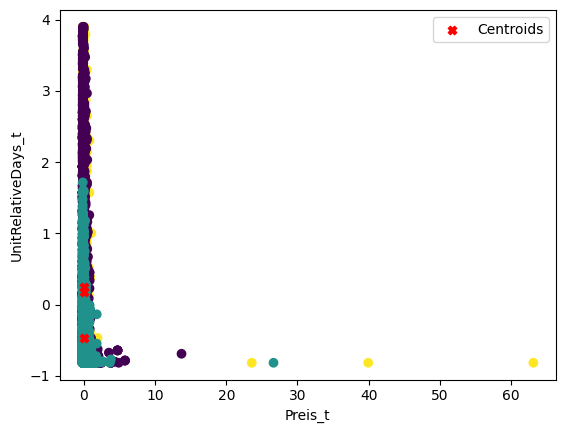

In [18]:
dimensions = list(df_train.columns.values)
for i in range(len(dimensions)):
    if dimensions[i].startswith('Customerid') \
    or dimensions[i].startswith('Orderid') \
    or dimensions[i].startswith('Produktkey'):
        continue
    for j in range(i + 1, len(dimensions)):
        if dimensions[j].startswith('Customerid') \
        or dimensions[j].startswith('Orderid') \
        or dimensions[j].startswith('Produktkey'):
            continue
        x_axis = i
        y_axis = j
        
        plt.scatter(data[:, x_axis], data[:, y_axis], c=labels, cmap='viridis')
        plt.scatter(centroids[:, x_axis], centroids[:, y_axis], c='red', marker='X', label='Centroids')
        plt.legend()
        plt.xlabel(dimensions[x_axis])
        plt.ylabel(dimensions[y_axis])
        #if you want to direclty see it here
        plt.show()
        #if you want to store all pictures in the given route
        #plt.savefig(f'{script_directory}/visualizations/scatter_plot_{dimensions[x_axis]}_{dimensions[y_axis]}.png')
        # Clear the current plot for the next iteration
        plt.clf()
plt.close('all')
